# Advanced Python: Plotting

This is not meant to be a comprehensive guide to plotting, but more of a primer to give you a taste of the fancy things you can to with matplotlib. The examples in here were created by IceCube and RNO grad students as part of their research.

More examples like this can be found in the advanced plotting folder here: https://user-web.icecube.wisc.edu/~icecube-bootcamp/bootcamp2019/advanced_plotting/exercise/advanced_plotting.ipynb and here
https://user-web.icecube.wisc.edu/~icecube-bootcamp/bootcamp2019/advanced_plotting/examples/

This barely scratches the surface of what you can do. The matplotlib documentation has many good examples https://matplotlib.org/gallery/index.html, and in general is a great reference.

If you're interested in making plots pretty, readable, and colorblind friendly then you might want to check out: https://seaborn.pydata.org/, https://gka.github.io/palettes/, http://colorbrewer2.org/

## Table of Contents

* [State Machine Interface](#statemachine)
    * [Simple Plot](#simple)
    * [Multiple Lines on one Plot](#multiple)
    * [Customization](#customization)
    * [Histogram](#histogram)
* [Object Oriented Interface](#object)
    * [Basic Figure and Axis](#figax)
    * [Subplots](#subplots)
    * [Axis Limits](#axislimits)
* [Walk-through example: Ratio Plot](#ratio)

In [1]:
import numpy as np
import matplotlib
import matplotlib.figure
%matplotlib inline
import matplotlib.pyplot as plt

## State Machine Interface <a class="anchor" id="statemachine"></a>
Many simple plots can be made with the state-machine interface. In this interface there is a global state that contains information about our plot and subsequent calls to `pyplot` modify that state.

### Simple Plot <a class="anchor" id="simple"></a>

In [2]:
# Create some fake data

xs = np.linspace(-5,5)
ys = xs**2

Very simple plot: plot x and y data, display the plot.

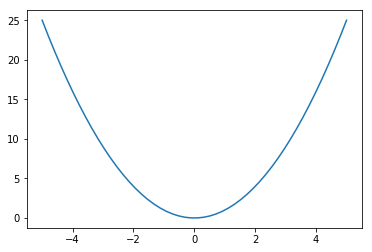

In [3]:
plt.plot(xs,ys)
plt.show()

Let's add some axis labels. Note: plt.show() should always be very last!

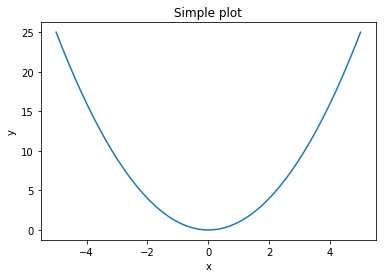

In [4]:
plt.plot(xs,ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot')
plt.show()

Let's add a legend. To do this we must label each line when we plot it, and then create the legend.

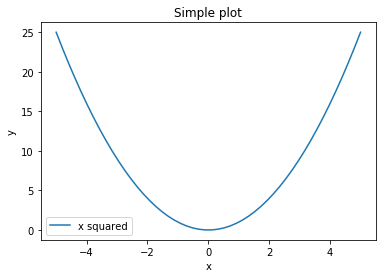

In [5]:
plt.plot(xs,ys,label='x squared')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot')
plt.legend()
plt.show()

We can also use $ to generate latex style mark down in labels, titles, and legends to display math symbols.

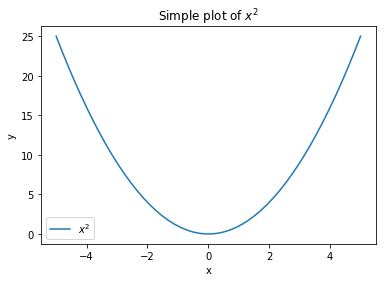

In [6]:
plt.plot(xs,ys,label='$x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot of $x^2$')
plt.legend()
plt.show()

### Multiple lines on one plot <a class="anchor" id="multiple"></a>

In [7]:
# Create some fake data

xs = np.linspace(-2,2)
y1 = xs**1
y2 = xs**2
y3 = xs**3

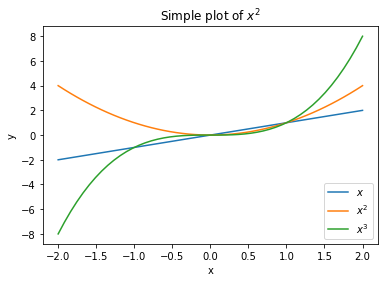

In [20]:
plt.plot(xs,y1,label='$x$')
plt.plot(xs,y2,label='$x^2$')
plt.plot(xs,y3,label='$x^3$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot of $x^2$')
plt.legend()
plt.show()

### Customization <a class="anchor" id="customization"></a>

We can also customize the colors or the line styles.

List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

Line styles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

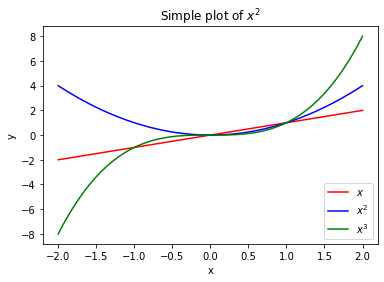

In [23]:
plt.plot(xs,y1,label='$x$',color='r')
plt.plot(xs,y2,label='$x^2$',color='b')
plt.plot(xs,y3,label='$x^3$',color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot of $x^2$')
plt.legend()
plt.show()

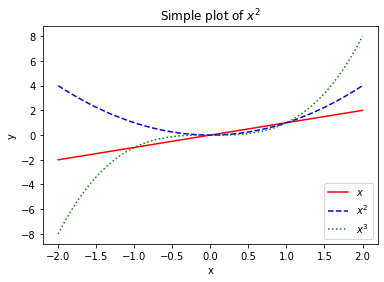

In [25]:
plt.plot(xs,y1,label='$x$',color='r',linestyle='solid')
plt.plot(xs,y2,label='$x^2$',color='b',linestyle='dashed')
plt.plot(xs,y3,label='$x^3$',color='g',linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple plot of $x^2$')
plt.legend()
plt.show()

### Histogram <a class="anchor" id="histogram"></a>

In [37]:
# Create some fake data

xs = np.random.randn(10000)

Most basic histogram

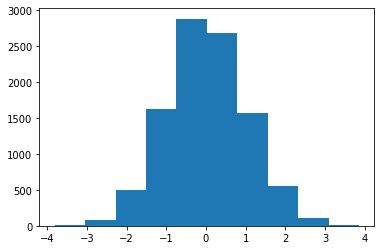

In [38]:
plt.hist(xs)
plt.show()

Customized histogram

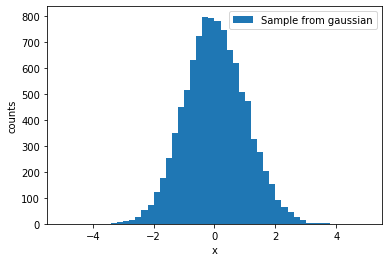

In [41]:
# Define custom bin edges
custom_bins = np.linspace(-5,5,51)

# Create the histogram
plt.hist(xs,bins=custom_bins,label='Sample from gaussian')

# Labels
plt.xlabel('x')
plt.ylabel('counts')

# Create the legend
plt.legend()

# Display
plt.show()

## Object Oriented Interface <a class="anchor" id="object"></a>
For more involved plots, it can be benefical to use the object oriented version.

### Basic figure and axis  <a class="anchor" id="figax"></a>

Instead of calling plt directly, we will create figure and axis object which we can refer back to.

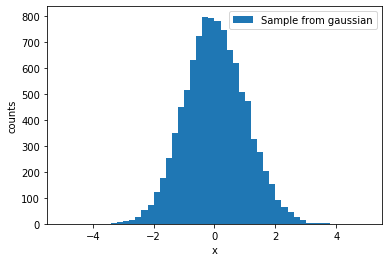

In [43]:
fig, ax = plt.subplots(1)

# Define custom bin edges
custom_bins = np.linspace(-5,5,51)

# Create the histogram
ax.hist(xs,bins=custom_bins,label='Sample from gaussian')

# Labels, we now use "set_" to set the labels.
ax.set_xlabel('x')
ax.set_ylabel('counts')

# Create the legend
ax.legend()

# Display
plt.show()

### Subplots <a class="anchor" id="subplots"></a>

Let's create two figures side by side.

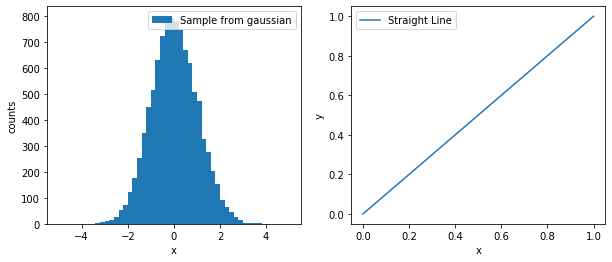

In [60]:
# Now ax is an array of axes so will have to specificy which element
# Let's also use the figsize option to adject the width.
fig, ax = plt.subplots(1,2,figsize=(10,4))

# Create a histogram on the first axis
ax[0].hist(xs,bins=custom_bins,label='Sample from gaussian')

# Draw a plot on the other
ax[1].plot([0,1],[0,1],label='Straight Line')

# Again specify 0 and 1 when setting elements
ax[0].set_xlabel('x')
ax[0].set_ylabel('counts')
ax[0].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

# Display
plt.show()

### Axis Limits <a class="anchor" id="axislimits"></a>

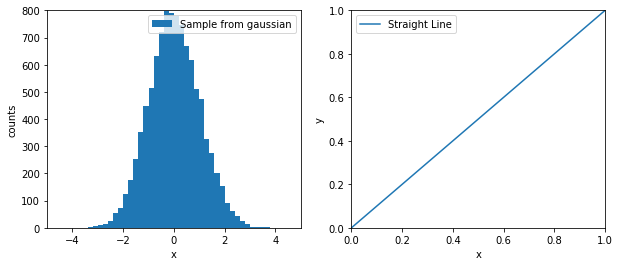

In [63]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].hist(xs,bins=custom_bins,label='Sample from gaussian')
ax[1].plot([0,1],[0,1],label='Straight Line')

ax[0].set_xlabel('x')
ax[0].set_ylabel('counts')
ax[0].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

# Now let's use set_xlim and set_ylim
ax[0].set_xlim([-5,5])
ax[0].set_ylim([0,800])
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])

plt.show()

## Walk-through example: Ratio Plot <a class="anchor" id="ratio"></a>

Create some fake data. Two random normal distributions.

In [65]:
y1 = np.random.randn(100000)
y2 = np.random.randn(100000)

Now we'll build up our example piece by piece, so each code block will take the previous and add a little more.

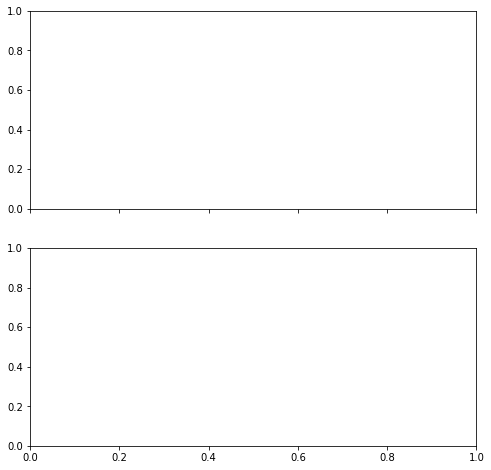

In [69]:
# We'll use the sharex option
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True)

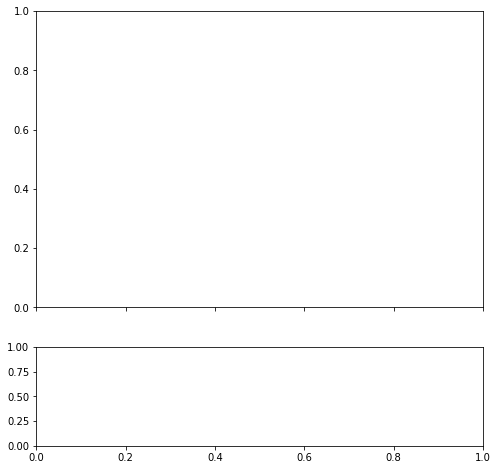

In [72]:
# We'll use the sharex option, and make the top axis three times larger than the bottom axis
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw={'height_ratios':[3,1]})

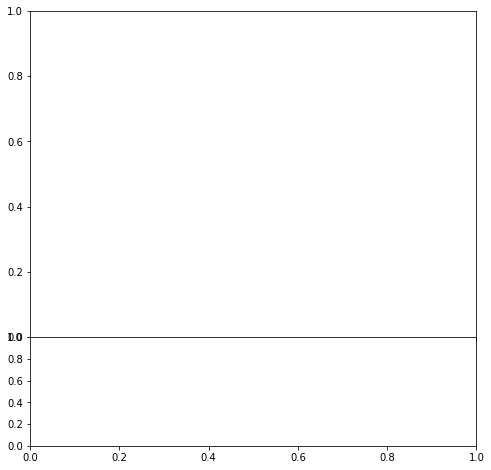

In [71]:
# We'll use the sharex option, and make the top axis three times larger than the bottom axis
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw={'height_ratios':[3,1]})

# Let's remove the gap between plots
fig.subplots_adjust(hspace=0)

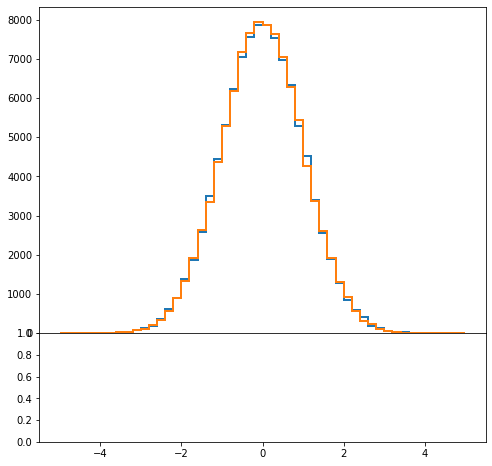

In [109]:
# We'll use the sharex option, and make the top axis three times larger than the bottom axis
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw={'height_ratios':[3,1]})

# Let's remove the gap between plots
fig.subplots_adjust(hspace=0)

# Plot two histograms on the first axis
# We'll use the hist type 'step' so we can see through
ax[0].hist(y1,bins=custom_bins,label='y1',histtype='step',linewidth=2)
ax[0].hist(y2,bins=custom_bins,label='y2',histtype='step',linewidth=2)

plt.show()

/Users/kleonard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


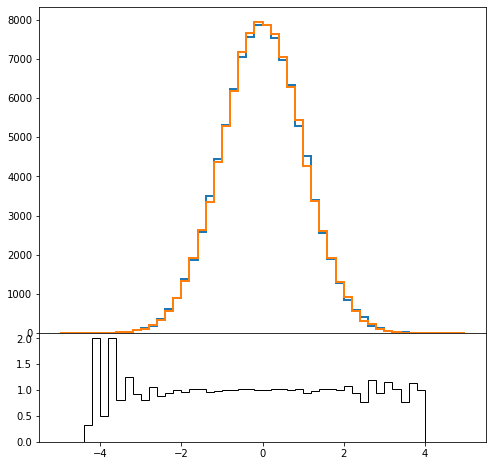

In [110]:
# We'll use the sharex option, and make the top axis three times larger than the bottom axis
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw={'height_ratios':[3,1]})

# Let's remove the gap between plots
fig.subplots_adjust(hspace=0)

# Plot two histograms on the first axis
# We'll use the hist type 'step' so we can see through
ax[0].hist(y1,bins=custom_bins,label='y1',histtype='step',linewidth=2)
ax[0].hist(y2,bins=custom_bins,label='y2',histtype='step',linewidth=2)

# We want the values in the histrogram and then take the ratio
hist1,_ = np.histogram(y1,bins=custom_bins)
hist2,_ = np.histogram(y2,bins=custom_bins)
hist_ratio = hist2/hist1

# There may be some nan values because of division by 0, so we'll assign these to 0 instead.
hist_ratio = [0 if np.isnan(i) else i for i in hist_ratio]

# Draw a plot on the other
# Note the bins are the bin edges, so there's actually one fewer bin than edge. We'll have to get rid of the last bin.
# We'll put one entry in each bin and then assign the height using "weights"
ax[1].hist(custom_bins[:-1],bins=custom_bins,weights=hist_ratio,label='Ratio',color='k',histtype='step')

# Display
plt.show()

/Users/kleonard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


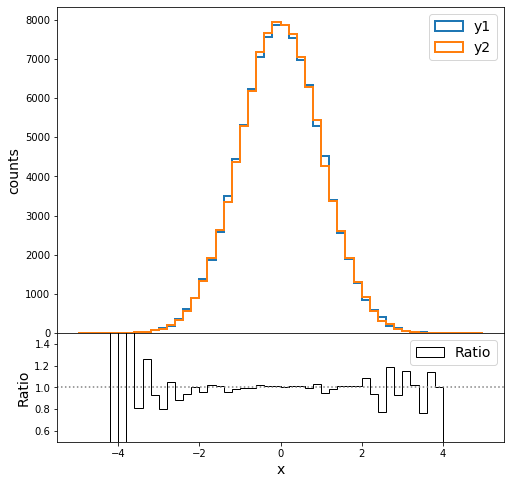

In [107]:
# We'll use the sharex option, and make the top axis three times larger than the bottom axis
fig, ax = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw={'height_ratios':[3,1]})

# Let's remove the gap between plots
fig.subplots_adjust(hspace=0)

# Plot two histograms on the first axis
# We'll use the hist type 'step' so we can see through
ax[0].hist(y1,bins=custom_bins,label='y1',histtype='step',linewidth=2)
ax[0].hist(y2,bins=custom_bins,label='y2',histtype='step',linewidth=2)

# We want the values in the histrogram and then take the ratio
hist1,_ = np.histogram(y1,bins=custom_bins)
hist2,_ = np.histogram(y2,bins=custom_bins)
hist_ratio = hist2/hist1

# There may be some nan values because of division by 0, so we'll assign these to 0 instead.
hist_ratio = [0 if np.isnan(i) else i for i in hist_ratio]

# Draw a plot on the other
# Note the bins are the bin edges, so there's actually one fewer bin than edge. We'll have to get rid of the last bin.
# We'll put one entry in each bin and then assign the height using "weights"
ax[1].hist(custom_bins[:-1],bins=custom_bins,weights=hist_ratio,label='Ratio',color='k',histtype='step')

# Draw a flat line at 1 for reference, and zoom the y limit into this region
ax[1].axhline(1,color='grey',linestyle='dotted')
ax[1].set_ylim(0.5,1.5)

# Let's make the font sizes larger so it's more readable
ax[0].set_xlabel('x',fontsize=14)
ax[0].set_ylabel('counts',fontsize=14)
ax[0].legend(fontsize=14)
ax[1].set_xlabel('x',fontsize=14)
ax[1].set_ylabel('Ratio',fontsize=14)
ax[1].legend(fontsize=14)

# Display
plt.show()